In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("C:/Users/Admin/Desktop/covidvariants.csv")
df

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [3]:
df.shape

(100416, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


In [5]:
df.describe()

,num_sequences,perc_sequences,num_sequences_total
count,100416.000000,100416.000000,100416.000000
mean,72.171676,6.154355,1509.582457
std,1669.262169,21.898989,8445.291772
min,0.000000,-0.010000,1.000000
25%,0.000000,0.000000,12.000000
50%,0.000000,0.000000,59.000000
75%,0.000000,0.000000,394.000000
max,142280.000000,100.000000,146170.000000


In [6]:
df.head()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3


In [7]:
df.tail()

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6
100415,Zimbabwe,2021-11-01,non_who,0,0.0,6


In [8]:
print(f"Number of Countries: {df.location.nunique()}")
print(f"Dates: {df.date.nunique()}")
print(f"Number of Variants: {df.variant.nunique()}")
print(f"Name of variants: {df.variant.unique()}")

Number of Countries: 121
Dates: 45
Number of Variants: 24
Name of variants: ['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'others' 'non_who']


In [9]:
df_new = df.groupby(["variant", "location"])["date"].max().reset_index()

In [10]:
df_new

,variant,location,date
0,Alpha,Angola,2021-10-04
1,Alpha,Argentina,2021-12-27
2,Alpha,Aruba,2021-12-13
3,Alpha,Australia,2021-12-27
4,Alpha,Austria,2021-12-13
...,...,...,...
2899,others,United States,2022-01-05
2900,others,Uruguay,2021-05-03
2901,others,Vietnam,2021-12-27
2902,others,Zambia,2021-12-27


In [11]:
df_new.shape

(2904, 3)

In [12]:
df_new = df_new.merge(df, how="left")

In [13]:
df_new

,variant,location,date,num_sequences,perc_sequences,num_sequences_total
0,Alpha,Angola,2021-10-04,0,0.0,33
1,Alpha,Argentina,2021-12-27,0,0.0,94
2,Alpha,Aruba,2021-12-13,0,0.0,61
3,Alpha,Australia,2021-12-27,0,0.0,1726
4,Alpha,Austria,2021-12-13,0,0.0,183
...,...,...,...,...,...,...
2899,others,United States,2022-01-05,0,0.0,35
2900,others,Uruguay,2021-05-03,21,100.0,21
2901,others,Vietnam,2021-12-27,0,0.0,50
2902,others,Zambia,2021-12-27,0,0.0,7


In [14]:
df_new.shape

(2904, 6)

In [15]:
df_new.tail()

,variant,location,date,num_sequences,perc_sequences,num_sequences_total
2899,others,United States,2022-01-05,0,0.0,35
2900,others,Uruguay,2021-05-03,21,100.0,21
2901,others,Vietnam,2021-12-27,0,0.0,50
2902,others,Zambia,2021-12-27,0,0.0,7
2903,others,Zimbabwe,2021-11-01,0,0.0,6


In [16]:
print(f"Number of Countries: {df_new.location.nunique()}")
print(f"Dates: {df_new.date.nunique()}")
print(f"Number of Variants: {df_new.variant.nunique()}")
print(f"Name of variants: {df_new.variant.unique()}")

Number of Countries: 121
Dates: 17
Number of Variants: 24
Name of variants: ['Alpha' 'B.1.1.277' 'B.1.1.302' 'B.1.1.519' 'B.1.160' 'B.1.177' 'B.1.221'
 'B.1.258' 'B.1.367' 'B.1.620' 'Beta' 'Delta' 'Epsilon' 'Eta' 'Gamma'
 'Iota' 'Kappa' 'Lambda' 'Mu' 'Omicron' 'S:677H.Robin1' 'S:677P.Pelican'
 'non_who' 'others']


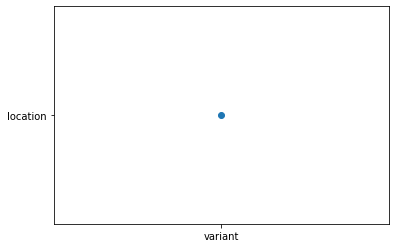

In [17]:
plt.scatter('variant','location')

In [18]:
!pip install plotly

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [19]:
import plotly.express as px

In [21]:
fig = px.treemap(df_new, path = ['variant', 'location'], values = 'perc_sequences',
                title="Country and variant wise Percentage sequences")
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

